[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Concepts/Python/Error%20Types%2c%20P%2dValues%2c%20False%2dPositive%20Risk%2c%20and%20Power%20Analysis.ipynb)

# Definitions

## Outcomes

In general, you can think of four possible outcomes of an experiment relative to a Null Hypothesis (H0):

1\. **False positive**: $H_0$ is true and $H_0$ is rejected. This outcome is called a **Type I error**, and its rate of occurrence is usually denoted as $\alpha$.

2\. **True negative**: $H_0$ is true and $H_0$ is not rejected. This outcome is the complement of a false positive error (i.e., it is the only other possibility when $H_0$ is true) and thus its rate of occurrence is usually denoted as $1-\alpha$.

3\. **False negative:** $H_0$ is false and $H_0$ is not rejected. This outcome is called a **Type II error**, and its rate of occurrence is usually denoted as $\beta$.

4\. **True positive**: $H_0$ is false and $H_0$ is rejected. This outcome is the complement of a false negative error (i.e., it is the only other possibility when $H_0$ is false) and thus its rate of occurrence is usually denoted as $1-\beta$.

## *p*-values

A *p* value describes the probability of obtaining your data (more precisely the value of the test statistic you are using to summarize your data), given the assumption that the Null hypothesis ($H_0$) is true. It is typically related to the concepts listed above by comparing its value to a rejection threshold equal to $\alpha$, the Type I error rate you have defined conditioned on the Null hypothesis being true; i.e., reject $H_0$ if $p<\alpha$ (note that this formulation does not imply that your obtained *p* value or chosen $\alpha$ quantifies the probability that your data represents a false positive, [because knowing that would require knowing the prior probability that the Null hypothesis is true](https://colab.research.google.com/drive/1HW0L_d5Wpod3jbnY3iG7mLhMG6yWHvF2?usp=sharing)).

See "Additional Resources" below for links to paper arguing that *p*-values are over-used, mis-interpreted, and/or should be abandoned completely. Despite the arguments put forward in those papers, *p*-values remain prevalent, and it is very likely you will use them in your studies. When doing so, the following concepts/approaches are important to use, whenever possible.



# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Concepts/PowerAnalysisExample1.m" and "Concepts/PowerAnalysisExample2.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statsmodels.stats.power import TTestIndPower

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# False-positive risk and Type I errors

False-positive risk is used to estimate the probably that an experiment will reject the Null hypothesis, given an estimate of the probability that the Null hypothesis is actually true; that is, the probability that it will produce a Type I error, corresponding to a false positive ($\alpha$) and complementary to a true negative ($1-\alpha$). **In general, false-positive risk is estimated in advance of conducting the experiment to help justify your experimental design, not post hoc to help justify the statistical reliability of your findings.**

Because here we are considering the probability of a hypothesis being true, we use a [Bayesian](https://colab.research.google.com/drive/1HW0L_d5Wpod3jbnY3iG7mLhMG6yWHvF2?usp=sharing) approach to compute the false-positive risk as:

$FPR=\frac{p\pi_0}{p\pi_0+(1-\beta)(1-\pi_0)}$

where *p* is the p-value you are using, $\pi_0$ is the probability that the Null hypothesis is true based on prior evidence, and $(1−\beta)$ is the expected true-positive rate or study power (see below). Because $\pi_0$ can be difficult to know, it is sometimes assumed to be 0.5 and used to compute the "minimum FPR."

Note that for *p*=0.05, $\pi_0$=0.5, and $\beta$=0.8, the minimum FPR=0.2 -- which is much bigger than the *p* value!

In [ ]:
p = 0.05
pi0 = 0.5
beta = 0.8

minFPR = (p*pi0)/(p*pi0+(1-beta)*(1-pi0))
print(f'minimum FPR = {minFPR:.1f}')

minimum FPR = 0.2


# Power analysis and Type II errors

Power analysis is used to estimate the probably that an experiment will detect an effect, given that the effect is actually present; that is, the probability that it will not produce a Type II error, corresponding to a true positive ($1-\beta$) and complementary to a false negative ($\beta$). **In general, power analysis is done in advance of conducting the experiment to help justify your experimental design, not post hoc to help justify the statistical reliability of your findings.**

A power analysis is based on four quantities that you must know, guess at, or figure out before you can do the calculation:

1\. Effect size: the magnitude of your test statistic that you might expect to obtain in your experiment; e.g., a Pearson's correlation coefficient of 0.4.

2\. Sample size: the number of observations in the experimental sample you plan to obtain.

3\. Significance level: the p-value you will use in your hypothesis testing, usually $\alpha$.

4\. Statistical power: the power you wish to obtain, usually $1-\beta$

## Example 1 (Button et al 2013)

Below we will write some code to play with the analysis shown in Fig. 1 of:

Button et al (2013), [Power failure: why small sample size undermines the reliability of neuroscience](https://www.nature.com/articles/nrn3475), Nature Reviews Neuroscience.

![](https://drive.google.com/uc?export=view&id=1K9iRvlNRzqbFCaaGVVW6W6Y1UMYVN_DT)

**Figure legend**: Statistical power of a replication study. a | If a study finds evidence for an effect at p=0.05, then the difference between the mean of the null distribution (indicated by the solid blue curve) and the mean of the observed distribution (dashed blue curve) is 1.96×sem. b | Studies attempting to replicate an effect using the same sample size as that of the original study would have roughly the same sampling variation (that is, sem) as in the original study. Assuming, as one might in a power calculation, that the initially observed effect we are trying to replicate reflects the true effect, the potential distribution of these replication effect estimates would be similar to the distribution of the original study (dashed green curve). A study attempting to replicate a nominally significant effect (p~0.05), which uses the same sample size as the original study, would therefore have (on average) a 50% chance of rejecting the null hypothesis (indicated by the coloured area under the green curve) and thus only 50% statistical power. c | We can increase the power of the replication study (coloured area under the orange curve) by increasing the sample size so as to reduce the sem. Powering a replication study adequately (that is, achieving a power ?80%) therefore often requires a larger sample size than the original study, and a power calculation will help to decide the required size of the replication sample.

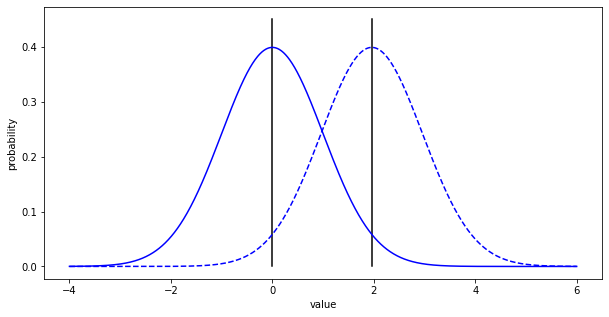

49883 positive outcomes out   of 100000 experiments (49.88 pct)


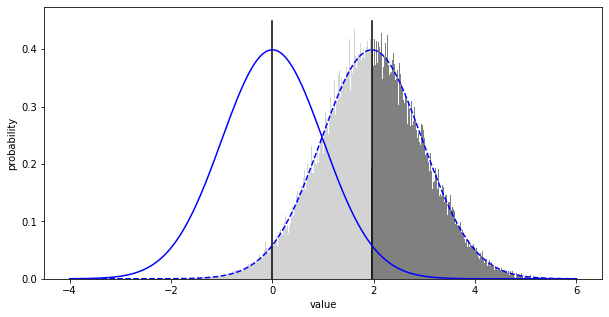

In [ ]:
# Assume that an original study identified an effect size,
#   representing the difference in the mean value of a test distribution
#   versus a null distribution, divided by their common standard deviation
#   (i.e., the z-score of their difference), at exactly p=0.05. Remember
#   that these are distributions of mean values, so the standard deviations
#   of these distributions represent standard errors of the mean. For a
#   two-tailed test, this p-value implies that 0.975 of the area of the
#   null distribtion is less than the effect size:
effect_size = st.norm.ppf(0.975)

# We can now reproduce the first panel:
plt.figure(figsize=(10, 5))
mu_0 = 0
sem = 1      # make it easy by assuming sem=1
mu_1 = effect_size*sem
bin_size = 0.01
x_axis = np.arange(-4, 6+bin_size, bin_size)
x_edges = np.arange(x_axis[0]-bin_size/2, x_axis[-1]+bin_size, bin_size)
plt.plot([mu_0, mu_0], [0, 0.45], 'k-')
plt.plot([mu_1, mu_1], [0, 0.45], 'k-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_0, sem), 'b-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_1, sem), 'b--')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()

# Now what happens when we try to replicate the result under the exact
#   same conditions? Let's simulate N experiments:
N = 100000

# In each simulated experiment, we end up with a mean value that comes
#   from the experimental distribution, and we only reject the Null
#   hypothesis if the value is greater than or equal to the previous effect size:
outcomes = np.random.normal(mu_1, sem, N)
outcome_is_positive = outcomes >= effect_size
print(f'{np.count_nonzero(outcome_is_positive)} positive outcomes out \
  of {N} experiments ({np.count_nonzero(outcome_is_positive)/N*100:.2f} pct)')

# We can plot these results as a normalized histogram
counts_no_effect, _ = np.histogram(outcomes[np.logical_not(outcome_is_positive)], bins=x_edges)
counts_effect, _    = np.histogram(outcomes[outcome_is_positive], bins=x_edges)
counts_all, _       = np.histogram(outcomes, bins=x_edges)
normalizer          = np.trapz(counts_all, dx=bin_size)

# Plot it
plt.figure(figsize=(10, 5))
plt.bar(x_axis, counts_no_effect/normalizer, width=0.01, color='lightgray')
plt.bar(x_axis, counts_effect/normalizer, width=0.01, color='gray')
plt.plot([mu_0, mu_0], [0, 0.45], 'k-')
plt.plot([mu_1, mu_1], [0, 0.45], 'k-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_0, sem), 'b-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_1, sem), 'b--')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()

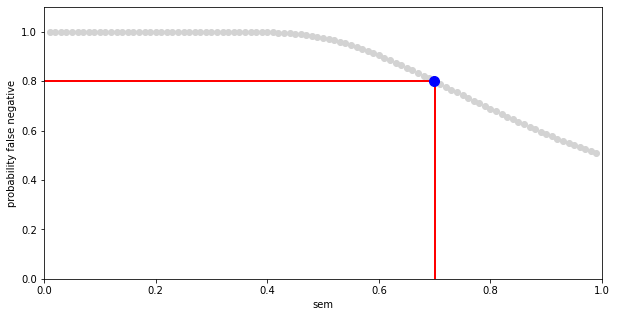

In [ ]:
# We can increase the power by increasing the signal-to-noise ratio (SNR) of
#   our sample, via a reduction in sem and assuming the same mean effect size.
#   The figure in the paper is confusing, because increasing SNR would narrow
#   *both* distributions (because we assume that the two hypotheses differ only
#   by their mean value, not the STD of the distributions). It is the change in
#   both distributions that explains why you would be less likely to reject the
#   Null hypothesis for the same effect size under these conditions.
#
# Also note that sem depends on both the number of samples (N) and the STD of
#   the sampled distribution, so we need to define N or STD to be able to
#   express sem in terms of the other of those two values.

# We can use a power analysis to find the new sem. The key point is that a
#   power analysis describes a relationship between the effect size and the
#   power -- so we can define a particular power to compute the effect size.
#   In this case, this computation is equivalent to doing a z test with one
#   sample and a power of 80%, which can be computed as follows (which is
#   basically computing: what is the mean of a standard normal distribution
#   that has 80% of its mass >= the cutoff for the null distribution at z=0.975?)
power = 0.8
new_effect_size = st.norm.ppf(0.975) - st.norm.ppf(1-power)

# This effect size is again the z-score, given the same mean difference
#   as above and the new sem -- so we can use it to compute the new sem:
old_effect_size = st.norm.ppf(0.975)
old_sem = 1
mu_0 = 0
mu_1 = effect_size*old_sem
new_sem = (mu_1-mu_0)/new_effect_size

# To show that this is the case, let's try a bunch of sems and find the
#   value that corresponds to when 80% of the effect distribution is >= the
#   p=0.05 cutoff for the null distribution

# Try a bunch of sems, smaller than before (i.e., <1)
sems = np.arange(0.01, 1, 0.01)
vals = np.zeros(np.size(sems))

# Loop through them
for idx, val in enumerate(sems):

   # The probability of not rejecting the null hypothesis when the null
   #  hypothesis is false is the mass of the effect distribution, which still
   #  has a mean value of effectSize but now has the given sem, that is to the
   #  right of the new cutoff
   new_cutoff = st.norm.ppf(0.975, mu_0, val)
   vals[idx] = 1 - st.norm.cdf(new_cutoff, effect_size, val)

# Plot it
plt.figure(figsize=(10, 5))
plt.plot(sems, vals, 'o', color='lightgray')
val_indices = np.flatnonzero(vals<=0.8)
new_sem2 = sems[val_indices[0]]
plt.plot([new_sem2, new_sem2], [0, 0.8], 'r-', linewidth=2)
plt.plot([0, new_sem2], [0.8, 0.8], 'r-', linewidth=2)
plt.plot(new_sem, 0.8, 'bo', markerfacecolor='b', markersize=10)
plt.xlabel('sem')
plt.ylabel('probability true positive')
plt.axis([0, 1, 0, 1.1])
plt.show()

79804 positive outcomes out of   100000 experiments (79.80 pct)


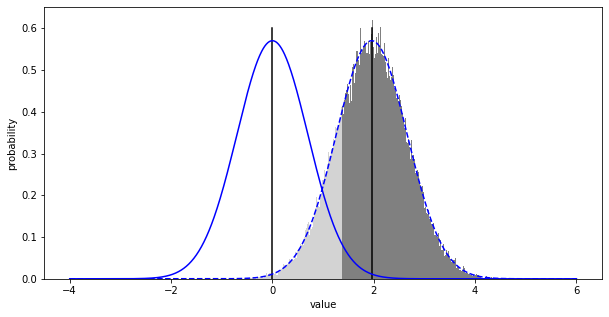

In [ ]:
# Now do the simulated experiments as above, but with the new distributions
N = 100000
power = 0.8
new_effect_size = st.norm.ppf(0.975) - st.norm.ppf(1-power)
old_sem = 1
mu_0 = 0
mu_1 = effect_size*old_sem
new_sem = (mu_1-mu_0)/new_effect_size

bin_size = 0.01
x_axis = np.arange(-4, 6+bin_size, bin_size)
x_edges = np.arange(x_axis[0]-bin_size/2, x_axis[-1]+bin_size, bin_size)

outcomes = np.random.normal(mu_1, new_sem, N)
outcome_is_positive = outcomes >= st.norm.ppf(0.975, mu_0, new_sem)
print(f'{np.count_nonzero(outcome_is_positive)} positive outcomes out of \
  {N} experiments ({np.count_nonzero(outcome_is_positive)/N*100:.2f} pct)')

# We can plot these results as a normalized histogram
counts_no_effect, _ = np.histogram(outcomes[np.logical_not(outcome_is_positive)], bins=x_edges)
counts_effect, _    = np.histogram(outcomes[outcome_is_positive], bins=x_edges)
counts_all, _       = np.histogram(outcomes, bins=x_edges)
normalizer          = np.trapz(counts_all, dx=bin_size)

# Plot it
plt.figure(figsize=(10, 5))
plt.bar(x_axis, counts_no_effect/normalizer, width=0.01, color='lightgray')
plt.bar(x_axis, counts_effect/normalizer, width=0.01, color='gray')
plt.plot([mu_0, mu_0], [0, 0.6], 'k-')
plt.plot([mu_1, mu_1], [0, 0.6], 'k-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_0, new_sem), 'b-')
plt.plot(x_axis, st.norm.pdf(x_axis, mu_1, new_sem), 'b--')
plt.xlabel('value')
plt.ylabel('probability')
plt.show()


## Example 2 (Joshi et al 2016)

Power analyses for a relationship between pupil diameter and neural activity in the locus coeruleus (LC), as shown in Fig. 3 of:

Joshi S, Li Y, Kalwani R, Gold JI (2016) [Relationships between pupil diameter and neuronal activity in the locus coeruleus, colliculi, and cingulate cortex](https://www.sciencedirect.com/science/article/pii/S089662731501034X?via%3Dihub). Neuron 89: 221-34.

<div>
<img src=https://drive.google.com/uc?export=view&id=1mIXmZBi7LNQlq3H1uAmEq0Az-uFAL1Kd width=250\>
<div>

**Figure legend**. Trial-by-Trial Associations between Mean Pupil Diameter and LC Spike Rate

(A–C) Example sessions. Per-trial mean pupil diameter (A) and spike rate (B) are each plotted as a function of the time of the beginning of stable fixation in the given trial, with respect to the beginning of the session. Lines are linear fits; (C) shows residuals to these fits. The line is a linear fit to the paired residuals, representing the partial correlation between pupil diameter and spike rate, accounting for linear drifts of each variable as a function of time within the session.

(D) Distributions of Spearman’s partial correlations (ρ) between trial-by-trial pupil diameter and spike rate, accounting for time within the session, for each session from each monkey and each brain region, as indicated. Darker/lighter symbols indicate ρ > 0/ρ < 0. Filled symbols indicate H0: ρ = 0, p < 0.05. Counts (percentages) of significant positive/negative effects are shown for each monkey (per-monkey percentages for positive or negative effects were indistinguishable between LC+ and IC but were different for SCi, including fewer positive effects for both monkeys and more negative effects for monkey Ci; chi-square test, p < 0.05). Black symbols indicate the example sessions above. Scatter along the abscissa is arbitrary, for readability. Horizontal lines are medians; thick lines indicate H0: median = 0, Wilcoxon rank-sum test, p < 0.05.

### Exercise

Do a post-hoc power analysis to determine the number of data samples needed to achieve 80% power for a series of possible effect sizes. Notes and tips:

1. Given that the data have already been collected, note that this is technically a "post-hoc" power analysis and is for demonstration purposes only. Normally these analyses must be done **before** collecting data.
2. Assume that a "data sample" is simply the non-parametric correlation coefficient between pupil diameter and LC activty measured in a given session.
3. Thus, to obtain a null distribution of these data samples, compute the correlation coefficients on simulated data that are independently generated from Poisson (for LC spiking data) and Gaussian (for pupil data)distributions.
4. Then plot n (number of data samples, corresponding to correlation coefficients measured in a single expermental session) needed for 80% power as a function of effect sizes.
5. To compute power, you can use TTestIndPower in Python, or sampsizepwr in Matlab

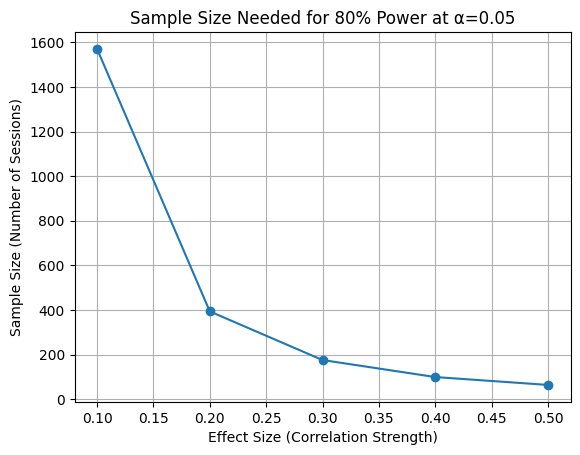

In [2]:
from scipy.stats import spearmanr, poisson, norm
from statsmodels.stats.power import TTestIndPower

# Set parameters for simulations
n_sessions = 100  # number of experimental sessions to simulate
n_trials_per_session = 100  # number of trials per session
effect_sizes = np.linspace(0.1, 0.5, 5)  # range of effect sizes (correlation strengths)
alpha = 0.05  # significance level
power = 0.80  # desired power level

# Function to simulate data and calculate correlation coefficients
def simulate_correlation(effect_size, n_trials):
    lc_spikes = poisson.rvs(mu=3, size=n_trials)  # Poisson-distributed spike rates
    pupil_diameter = norm.rvs(size=n_trials)      # Gaussian-distributed pupil diameters

    # Introduce the effect (correlation) by adding noise
    pupil_diameter += effect_size * lc_spikes

    # Compute Spearman correlation
    correlation, _ = spearmanr(lc_spikes, pupil_diameter)
    return correlation

# Perform power analysis using TTestIndPower
power_analysis = TTestIndPower()
sample_sizes = []

for effect_size in effect_sizes:
    # Simulate a number of sessions and calculate the correlation coefficient
    correlations = [simulate_correlation(effect_size, n_trials_per_session) for _ in range(n_sessions)]

    # Calculate the sample size needed for 80% power for each effect size
    # using the solve_power() function from the statsmodels library to calculate the minimum sample size needed to achieve a specified level of statistical power.
    sample_size = power_analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power, alternative='two-sided')
    sample_sizes.append(sample_size)

# Plot the sample size needed as a function of effect size
plt.plot(effect_sizes, sample_sizes, marker='o')
plt.xlabel('Effect Size (Correlation Strength)')
plt.ylabel('Sample Size (Number of Sessions)')
plt.title('Sample Size Needed for 80% Power at α=0.05')
plt.grid(True)
plt.show()



# Additional Resources


Power analysis introductions are [here](https://stats.idre.ucla.edu/other/mult-pkg/seminars/intro-power/) and [here](http://www.biostathandbook.com/power.html).

Demonstrations are [here](https://demonstrations.wolfram.com/PowerAnalysisForATwoSampleTTest/) and [here](https://rpsychologist.com/d3/nhst/).

Guidance for computing in [Matlab](https://www.mathworks.com/help/stats/sampsizepwr.html) (including a nice [tutorial](https://www.mathworks.com/help/stats/selecting-a-sample-size.html)\), [R](https://www.statmethods.net/stats/power.html), and [Python](https://www.geeksforgeeks.org/introduction-to-power-analysis-in-python/).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania